In [1]:
import pandas as pd
import os

from maca import clean_annotation, clean_labels

metadata_folder = os.path.join('..', 'metadata' )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
csv = os.path.join(metadata_folder, 'MACA_10x.csv')
tenx_metadata = pd.read_csv(csv, index_col=0)
print(tenx_metadata.shape)
tenx_metadata.head()

(94, 14)


,tenx.index,mouse.id,tissue,tissue.notes,mouse.age,mouse.sex,mouse.parabiont,mouse.parabiont_pair,pool,url.csv,url.mtx,url.genes,url.barcodes,tissue_v2
channel,,,,,,,,,,,,,,
10X_P1_1,A3,30-M-2,Kidney,KIDNEY,30,M,False,NaN,1,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Kidney
10X_P1_2,B3,30-M-2,Spleen,SPLEEN,30,M,False,NaN,1,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Spleen
10X_P1_3,C3,30-M-2,Heart,HEART (ALL MINUS AORTA),30,M,False,NaN,1,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Heart
10X_P1_4,D3,30-M-2,Heart,HEART (LV+RV ONLY),30,M,False,NaN,1,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Heart
10X_P1_5,E3,30-M-2,Marrow,BM (NON-STC),30,M,False,NaN,1,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Marrow


In [4]:
# tenx_metadata = tenx_metadata.replace("Mammary", 'Mammary_Gland')

In [5]:
tenx_metadata_3month = tenx_metadata.loc[tenx_metadata['mouse.age'] == 3]
print(tenx_metadata_3month.shape)
tenx_metadata_3month.head()

(28, 14)


,tenx.index,mouse.id,tissue,tissue.notes,mouse.age,mouse.sex,mouse.parabiont,mouse.parabiont_pair,pool,url.csv,url.mtx,url.genes,url.barcodes,tissue_v2
channel,,,,,,,,,,,,,,
10X_P4_0,A8,3-M-8,Tongue,TONGUE,3,M,False,NaN,4,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Tongue
10X_P4_1,B8,3-M-9,Tongue,TONGUE,3,M,False,NaN,4,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Tongue
10X_P4_2,C8,3-M-8/9,Liver,HEPATOCYTES,3,M,False,NaN,4,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Liver
10X_P4_3,D8,3-M-8,Bladder,BLADDER,3,M,False,NaN,4,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Bladder
10X_P4_4,E8,3-M-9,Bladder,BLADDER,3,M,False,NaN,4,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,https://s3.amazonaws.com/czbiohub-maca/10x_dat...,Bladder


In [6]:
tissue_n_channels = tenx_metadata_3month.groupby('tissue_v2').size()
tissue_n_channels

tissue_v2
Bladder    3
Heart      1
Kidney     3
Liver      3
Lung       4
Mammary    2
Marrow     2
Muscle     2
Spleen     2
Thymus     1
Tongue     3
Trachea    2
dtype: int64

In [7]:
tissues = tissue_n_channels.index

In [8]:
len(tissue_n_channels)

12

In [9]:
csv = os.path.join(metadata_folder, 'maca_3month_annotations_10x_ontology.csv')
cell_annotations = pd.read_csv(csv, index_col=0)
print(cell_annotations.shape)
cell_annotations.head()

(54837, 7)


,annotation,subannotation,tissue,annotation_subannotation,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id
10X_P4_3_AAAGTAGAGATGCCAG,mesenchymal,b,Bladder,mesenchymal: b,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACCGCGTCCAACCAA,mesenchymal,a,Bladder,mesenchymal: a,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACTCCCGTCGGGTCT,mesenchymal,a,Bladder,mesenchymal: a,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACTCTTAGTTGCAGG,luminal,a,Bladder,luminal: a,bladder cell,http://purl.obolibrary.org/obo/CL_1001319,CL:1001319
10X_P4_3_AACTCTTTCATAACCG,mesenchymal,a,Bladder,mesenchymal: a,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019


In [10]:
figure_folder = '/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures'

figure1_folder = f'{figure_folder}/Fig1/10x'
figure2_folder = f'{figure_folder}/Fig2/10x'

print(f'figure1_folder: "{figure1_folder}"')
print(f'figure2_folder: "{figure2_folder}"')

! mkdir -p "$figure1_folder"
! mkdir -p "$figure2_folder"

figure1_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/Fig1/10x"
figure2_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/Fig2/10x"


In [11]:
folder = '/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x/'

In [12]:
ls $folder/*_nreads_ngenes.csv

/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Bladder_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Heart_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Kidney_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Liver_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Lung_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Mammary_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Marrow_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Muscle_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Spleen_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Thymus_nreads_ngenes.csv
/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Tongue_nreads_n

In [13]:
import hermione as hm

In [14]:
! head $folder/Bladder*

==> /Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Bladder_cell_numbers.csv <==
"","Bladder"
"n_genes",14749
"n_cells_pass_qc",2500
"n_cells_sequenced",2500

==> /Users/olgabot/code/maca/metadata/number_of_cells_reads_genes_10x//Bladder_nreads_ngenes.csv <==
"","nGene","nUMI","orig.ident"
"10X_P4_3_AAAGTAGAGATGCCAG",2853,10291,"10X"
"10X_P4_3_AACCGCGTCCAACCAA",4194,17520,"10X"
"10X_P4_3_AACTCCCGTCGGGTCT",3347,12944,"10X"
"10X_P4_3_AACTCTTAGTTGCAGG",3851,19594,"10X"
"10X_P4_3_AACTCTTTCATAACCG",3809,14594,"10X"
"10X_P4_3_AAGACCTAGATCCGAG",3608,19190,"10X"
"10X_P4_3_AAGACCTAGGTGGGTT",4347,24484,"10X"
"10X_P4_3_AAGGAGCGTGCAACTT",1960,5005,"10X"
"10X_P4_3_AAGTCTGAGATAGTCA",2236,6253,"10X"


In [15]:
import glob
import os 
 
globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print('number of tissues: ', len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(51529, 4)
number of tissues:  12


,nGene,nUMI,orig.ident,tissue
10X_P4_3_AAAGTAGAGATGCCAG,2853,10291,10X,Bladder
10X_P4_3_AACCGCGTCCAACCAA,4194,17520,10X,Bladder
10X_P4_3_AACTCCCGTCGGGTCT,3347,12944,10X,Bladder
10X_P4_3_AACTCTTAGTTGCAGG,3851,19594,10X,Bladder
10X_P4_3_AACTCTTTCATAACCG,3809,14594,10X,Bladder


In [16]:
import numpy as np

In [17]:
nreads_ngenes['log10_nUMI'] = np.log10(nreads_ngenes['nUMI'])

In [18]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)

# Convert to dictionary to make sure the colors match up
colors = colors.to_dict()
colors

{'Aorta': '#1f77b4',
 'Bladder': '#aec7e8',
 'Brain_Microglia': '#ff7f0e',
 'Brain_Neurons': '#ffbb78',
 'Colon': '#2ca02c',
 'Diaphragm': '#98df8a',
 'Fat': '#d62728',
 'Heart': '#ff9896',
 'Kidney': '#9467bd',
 'Liver': '#c5b0d5',
 'Lung': '#8c564b',
 'Mammary': '#c49c94',
 'Marrow': '#e377c2',
 'Muscle': '#f7b6d2',
 'Pancreas': '#7f7f7f',
 'Skin': '#c7c7c7',
 'Spleen': '#bcbd22',
 'Thymus': '#dbdb8d',
 'Tongue': '#17becf',
 'Trachea': '#9edae5'}

In [19]:
# tissues = sorted(nreads_ngenes['tissue'].unique())
tissues

Index(['Bladder', 'Heart', 'Kidney', 'Liver', 'Lung', 'Mammary', 'Marrow',
       'Muscle', 'Spleen', 'Thymus', 'Tongue', 'Trachea'],
      dtype='object', name='tissue_v2')

In [20]:
kwargs = dict(data=nreads_ngenes, row='tissue', kdeplot_kws=dict(zorder=-1),
               row_order=tissues, palette=colors, xlabel_suffix='')

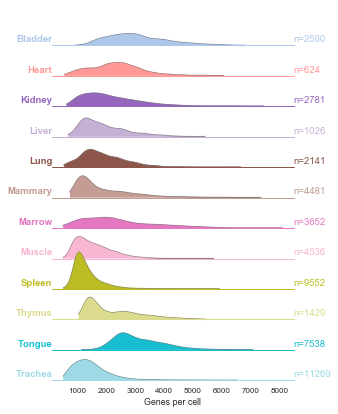

In [21]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')

for ax in g.axes.flatten():    
    # Add white gridlines
#     xticks = ax.get_xticks()
#     xmin, xmax, ymin, ymax = ax.axis()
#     ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
#     ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)


g.savefig(f'{figure1_folder}/horizonplot_genes_per_cell.pdf', bbox_inches='tight')